In [2]:
%load_ext autoreload
%autoreload 1
%aimport Joint_Generation,utils,Alternating_Minimization

import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
import random
from utils import *
from Joint_Generation import *
from Alternating_Minimization import *
import math
import scipy
import scipy.linalg
import scipy.stats
from sklearn.linear_model import LinearRegression, Lasso


Define the size of the location indicator $(p_1,p_2)$, and the size of the dictionary $(d_1,d_2)$.

In [3]:
## Input dimension settings
p = 100
D1 = 32
D2 = 32
N = 1000
p1 = 4
p2 = 4
d1 = 8
d2 = 8
mux = np.zeros((p))
muy = np.zeros((D1*D2))

Here we load the true signal shape as `1-block`.

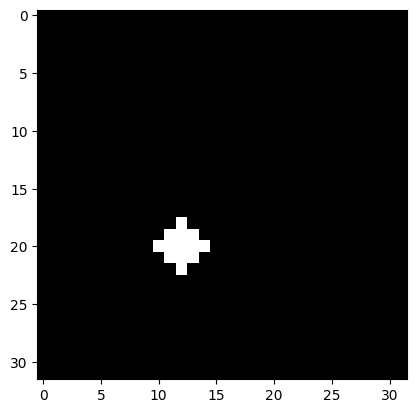

In [4]:
# Load true signal and visualize it
C_true = np.load('1-block.npy')
C_vec = C_true.reshape(D1*D2,1)
plt.imshow(C_true,cmap="gray")

Here we generate three data blocks $X$, $Y$ and $z$ with specified true canonical correlation.

In [5]:
X,Y,Yarray,theta,z,indx = data_generation(N=N,rho1=0.8,rho2=0.6,p=100,D1=D1,D2=D2,mux=mux,muy=muy,C_vec=C_vec,C_true=C_true,type="identity",verbose=False)

Now select the best hyper-parameter triple: $(\lambda_1,\lambda_2,R)$ by minimizing modified BIC criterion.

In [7]:
lam1_grid = np.array([0.002,0.004,0.005])
lam2_grid = np.array([0.00020,0.00025,0.00030])
R_grid = np.array([1,2,3])
cca_BIC_tuning(N,X,Yarray,z,lam1_grid,lam2_grid,R_grid,p1,p2,d1,d2,p,niter=5)

The BIC value for combination  0.002 0.0002 1 is:  -0.5496539017780417
The BIC value for combination  0.002 0.0002 2 is:  -0.5496818565478115
The BIC value for combination  0.002 0.0002 3 is:  -0.5496569038790214
The BIC value for combination  0.002 0.00025 1 is:  -0.6112761923247632
The BIC value for combination  0.002 0.00025 2 is:  -0.6112814286540944
The BIC value for combination  0.002 0.00025 3 is:  -0.6112563848792807
The BIC value for combination  0.002 0.0003 1 is:  -0.6292806791029565
The BIC value for combination  0.002 0.0003 2 is:  -0.6292587647270735
The BIC value for combination  0.002 0.0003 3 is:  -0.6294677629234384
The BIC value for combination  0.004 0.0002 1 is:  -0.5496399058167488
The BIC value for combination  0.004 0.0002 2 is:  -0.5496363558323998
The BIC value for combination  0.004 0.0002 3 is:  -0.5497112859621465
The BIC value for combination  0.004 0.00025 1 is:  -0.6112628180061423
The BIC value for combination  0.004 0.00025 2 is:  -0.6112627534633293
T

-0.6292875857938398

We can see the smallest BIC value is attained for $(0.004,0.003,3)$, so we use these hyper-parameter setting to fit the model.

TPR of theta is:  1.0
FPR of theta is:  0.010526315789473684
TPR of C is:  1.0
FPR of C is:  0.050445103857566766


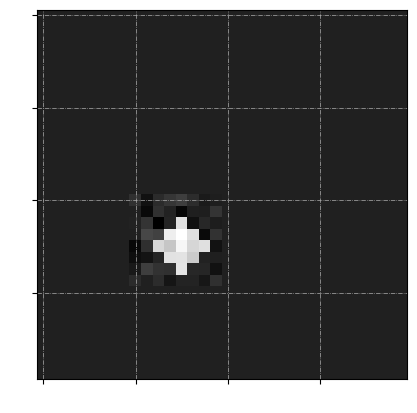

TPR for C is:  1.0
FPR for C is:  0.050445103857566766
TPR for theta is:  1.0
FPR for theta is:  0.010526315789473684
MSE for C is:  0.2690534561359772
MSE for theta is:  0.10555879347618104


In [9]:
a,b,thetahat = cca_alt_minimization(N,X,Yarray,z,lam1=0.004,lam2=0.0003,R=3,tau_x=0.01,tau_y=0.01,p1=p1,p2=p2,d1=d1,d2=d2,p=p,niter=5,init='uniform')
TPR_theta, FPR_theta, theta_err, TPR_C, FPR_C, C_err, C_hat, canoncor, zXcor, zYcor, sumcor = cca_sim_evaluation(N,X,Yarray,z,a=a,b=b,R=1,theta=theta,C_true=C_true,thetahat=thetahat,indx=indx,p1=p1,p2=p2,d1=d1,d2=d2,D1=D1,D2=D2,show=True)
print('TPR for C is: ',(TPR_C))
print('FPR for C is: ',(FPR_C))
print('TPR for theta is: ',(TPR_theta))
print('FPR for theta is: ',(FPR_theta))
print('MSE for C is: ',(C_err))
print('MSE for theta is: ',(theta_err))

In [ ]:

%reset